## فراخوانی فایل csv

In [57]:
import pandas as pd
customer =pd.read_csv('olist_customers_dataset.csv')
order =pd.read_csv('olist_orders_dataset.csv')
order_item =pd.read_csv('olist_order_items_dataset.csv')
print(customer.head())
print(order.head())
print(order_item.head())


                        customer_id  ... customer_state
0  06b8999e2fba1a1fbc88172c00ba8bc7  ...             SP
1  18955e83d337fd6b2def6b18a428ac77  ...             SP
2  4e7b3e00288586ebd08712fdd0374a03  ...             SP
3  b2b6027bc5c5109e529d4dc6358b12c3  ...             SP
4  4f2d8ab171c80ec8364f7c12e35b23ad  ...             SP

[5 rows x 5 columns]
                           order_id  ... order_estimated_delivery_date
0  e481f51cbdc54678b7cc49136f2d6af7  ...                    10/18/2017
1  53cdb2fc8bc7dce0b6741e2150273451  ...                     8/13/2018
2  47770eb9100c2d0c44946d9cf07ec65d  ...                      9/4/2018
3  949d5b44dbf5de918fe9c16f97b45f8a  ...                    12/15/2017
4  ad21c59c0840e6cb83a9ceb5573f8159  ...                     2/26/2018

[5 rows x 8 columns]
                           order_id  order_item_id  ...   price freight_value
0  00010242fe8c5a6d1ba2dd792cb16214              1  ...   58.90         13.29
1  00018f77f2f0320c557190d7a144bdd3   


## EDA

In [58]:
print(order.isnull().sum())
print(order_item.isnull().sum())
print(customer.isnull().sum())

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


## merge کردن سه تا جدول

In [59]:
df= (
    order.merge(customer, on='customer_id').merge(order_item, on='order_id')
)

df.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,10/2/2017,10/2/2017,10/4/2017,10/10/2017,10/18/2017,7c396fd4830fd04220f754e42b4e5bff,3149,sao paulo,SP,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,10/6/2017,29.99,8.72
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,7/24/2018,7/26/2018,7/26/2018,8/7/2018,8/13/2018,af07308b275d755c9edb36a90c618231,47813,barreiras,BA,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,7/30/2018,118.70,22.76
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,8/8/2018,8/8/2018,8/8/2018,8/17/2018,9/4/2018,3a653a41f6f9fc3d2a113cf8398680e8,75265,vianopolis,GO,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,8/13/2018,159.90,19.22
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,11/18/2017,11/18/2017,11/22/2017,12/2/2017,12/15/2017,7c142cf63193a1473d2e66489a9ae977,59296,sao goncalo do amarante,RN,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,11/23/2017,45.00,27.20
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2/13/2018,2/13/2018,2/14/2018,2/16/2018,2/26/2018,72632f0f9dd73dfee390c9b22eb56dd6,9195,santo andre,SP,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2/19/2018,19.90,8.72


In [60]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       112650 non-null  str    
 1   customer_id                    112650 non-null  str    
 2   order_status                   112650 non-null  str    
 3   order_purchase_timestamp       112650 non-null  str    
 4   order_approved_at              112635 non-null  str    
 5   order_delivered_carrier_date   111456 non-null  str    
 6   order_delivered_customer_date  110196 non-null  str    
 7   order_estimated_delivery_date  112650 non-null  str    
 8   customer_unique_id             112650 non-null  str    
 9   customer_zip_code_prefix       112650 non-null  int64  
 10  customer_city                  112650 non-null  str    
 11  customer_state                 112650 non-null  str    
 12  order_item_id                  112650 non

## تبدیل تایپ str به date برای دیتا های تاریخی

In [61]:
date_cols =[
    'order_delivered_carrier_date',
    'order_delivered_customer_date',
    'order_estimated_delivery_date',
    'order_purchase_timestamp',
    'order_approved_at',
    'shipping_limit_date'
]

for col in date_cols:
    df[col] = pd.to_datetime(df[col],errors='coerce')

In [62]:
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112650 non-null  str           
 1   customer_id                    112650 non-null  str           
 2   order_status                   112650 non-null  str           
 3   order_purchase_timestamp       112650 non-null  datetime64[us]
 4   order_approved_at              112635 non-null  datetime64[us]
 5   order_delivered_carrier_date   111456 non-null  datetime64[us]
 6   order_delivered_customer_date  110196 non-null  datetime64[us]
 7   order_estimated_delivery_date  112650 non-null  datetime64[us]
 8   customer_unique_id             112650 non-null  str           
 9   customer_zip_code_prefix       112650 non-null  int64         
 10  customer_city                  112650 non-null  str           
 11  customer_st

In [63]:
df.shape

(112650, 18)

## حذف سفارشات نرسیده و یا به عبارتی null ها

In [64]:
df= df[df['order_status'] == 'delivered']
df.info()

<class 'pandas.DataFrame'>
Index: 110197 entries, 0 to 112649
Data columns (total 18 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       110197 non-null  str           
 1   customer_id                    110197 non-null  str           
 2   order_status                   110197 non-null  str           
 3   order_purchase_timestamp       110197 non-null  datetime64[us]
 4   order_approved_at              110182 non-null  datetime64[us]
 5   order_delivered_carrier_date   110195 non-null  datetime64[us]
 6   order_delivered_customer_date  110189 non-null  datetime64[us]
 7   order_estimated_delivery_date  110197 non-null  datetime64[us]
 8   customer_unique_id             110197 non-null  str           
 9   customer_zip_code_prefix       110197 non-null  int64         
 10  customer_city                  110197 non-null  str           
 11  customer_state  

## اضافه کردن ستون های مورد نیاز
## قیمت کل
## زمان تحویل
## هر ماه
## هر سال


In [65]:
df['total_item_value'] = df['price'] + df['freight_value']
df['delivery_days'] = (df['order_delivered_customer_date'] - df['order_purchase_timestamp']).dt.days
df['order_date'] = df['order_purchase_timestamp'].dt.date
df['month'] = df['order_purchase_timestamp'].dt.strftime('%Y-%m')
df['year'] = df['order_purchase_timestamp'].dt.year

## میزان فروش در ماه

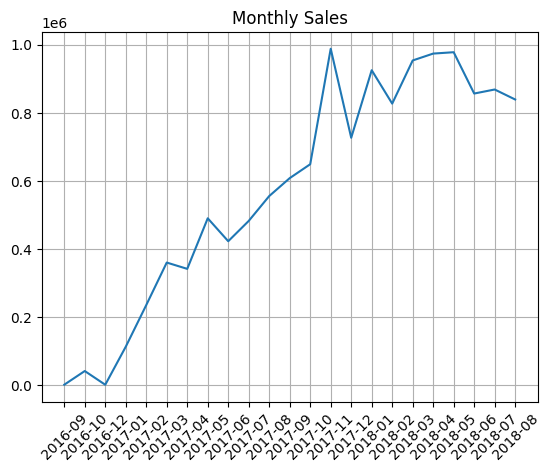

In [66]:
monthly_sales = (df.groupby('month')['price'].sum().reset_index())
import matplotlib.pyplot as plt
plt.plot(monthly_sales['month'].astype(str),monthly_sales['price'])
plt.xticks(rotation=45)

plt.title("Monthly Sales")
plt.grid()
plt.savefig('monthly_sales')
plt.show()


## میزان فروش در سال

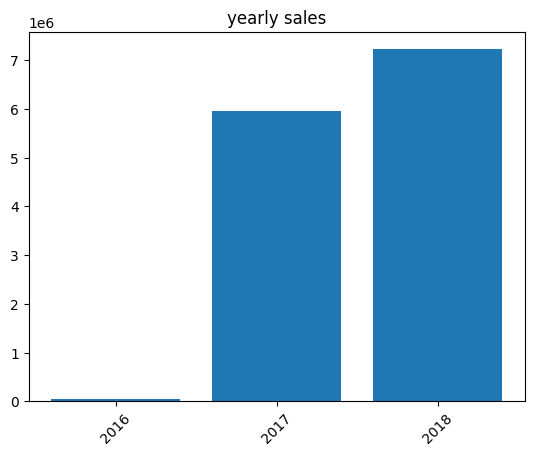

In [67]:
yearly_sales= (df.groupby('year')['price'].sum().reset_index())
plt.bar(yearly_sales['year'].astype(str),yearly_sales['price'])
plt.xticks(rotation=45)
plt.title("yearly sales")
plt.savefig('yearly_sales')
plt.show()

## میزان فروش هر منطقه

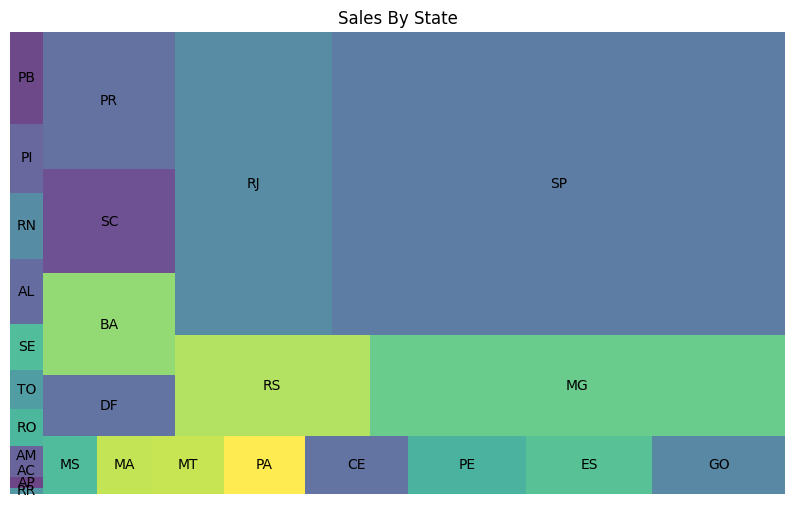

In [80]:
import squarify
sales_by_state= (df.groupby('customer_state')['price'].sum().sort_values(ascending=True).reset_index())
plt.figure(figsize=(10,6))
squarify.plot(
    sizes = sales_by_state['price'],
    label=sales_by_state['customer_state'],alpha=0.8
    )
plt.axis('off')
plt.title('Sales By State')
plt.savefig('Sales_By_State')
plt.show()

## زمان تحویل

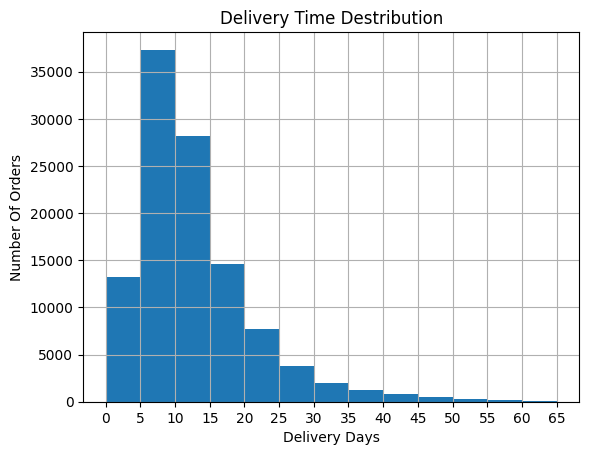

In [69]:
bins = range(0,70,5)
plt.Figure(figsize=(8,5))
plt.hist(df['delivery_days'],bins=bins)
plt.title('Delivery Time Destribution')
plt.xlabel('Delivery Days')
plt.ylabel('Number Of Orders')
plt.grid()
plt.xticks(bins)
plt.savefig('Delivery_days')
plt.show()

In [70]:
df.columns

Index(['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'customer_unique_id', 'customer_zip_code_prefix', 'customer_city',
       'customer_state', 'order_item_id', 'product_id', 'seller_id',
       'shipping_limit_date', 'price', 'freight_value', 'total_item_value',
       'delivery_days', 'order_date', 'month', 'year'],
      dtype='str')

## استان * ماه

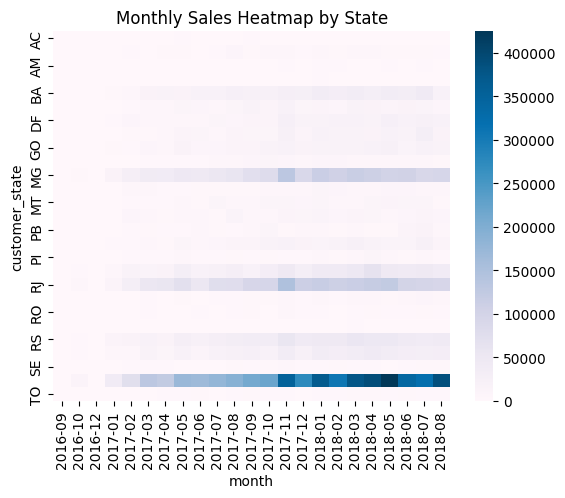

In [71]:
import seaborn as sns

State_Month_Sales= (
    df.groupby(['customer_state','month'])['price'].sum().reset_index()
)
heatmap_data = State_Month_Sales.pivot(
    index='customer_state',
    columns='month',
    values='price'
)
plt.Figure(figsize=(12,8))
sns.heatmap(heatmap_data.fillna(0),cmap='PuBu')
plt.title("Monthly Sales Heatmap by State")
plt.savefig('Monthly_Sales_by_State')
plt.show()


## df_Ml

In [72]:
df=df[df['delivery_days'].notna()]
target = 'delivery_days'
features = [
    'price',
    'freight_value',
    'month',
    'year',
    'customer_state'
]

X = df[features]
Y = df[target]

from sklearn.preprocessing import OneHotEncoder
categorical_cols =['customer_state','month']
X = pd.get_dummies(X,columns=categorical_cols,drop_first=True)

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split( X,Y,test_size=0.2,random_state=42)


## LinearRegression 

In [73]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train,y_train)
y_pred_1 = model.predict(x_test)

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
import numpy as np

mae =mean_absolute_error(y_test,y_pred_1)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred_1))
r2 = r2_score(y_test,y_pred_1)
print(f"MAE :{mae:.2f}")
print(f"RMSE :{rmse:.2f}")
print(f"R2 :{r2:.2f}")

MAE :5.15
RMSE :2.27
R2 :0.26


## Decision Tree

In [74]:
from sklearn.tree import DecisionTreeRegressor
model2 = DecisionTreeRegressor(random_state=42)
model2.fit(x_train,y_train)
y_pred_2 = model2.predict(x_test)
mae =mean_absolute_error(y_test,y_pred_2)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred_2))
r2 = r2_score(y_test,y_pred_2)
print(f"MAE :{mae:.2f}")
print(f"RMSE :{rmse:.2f}")
print(f"R2 :{r2:.2f}")

MAE :5.55
RMSE :2.36
R2 :-0.14


## random forest

In [75]:
from sklearn.ensemble import RandomForestRegressor
model3 = RandomForestRegressor(random_state=42)
model3.fit(x_train,y_train)
y_pred_3 = model3.predict(x_test)
mae =mean_absolute_error(y_test,y_pred_3)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred_3))
r2 = r2_score(y_test,y_pred_3)
print(f"MAE :{mae:.2f}")
print(f"RMSE :{rmse:.2f}")
print(f"R2 :{r2:.2f}")

MAE :4.74
RMSE :2.18
R2 :0.24


## Gradient Boosting

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
model4 = GradientBoostingRegressor(random_state=42)
model4.fit(x_train,y_train)
y_pred_4 = model4.predict(x_test)
mae =mean_absolute_error(y_test,y_pred_4)
rmse = np.sqrt(mean_absolute_error(y_test,y_pred_4))
r2 = r2_score(y_test,y_pred_4)
print(f"MAE :{mae:.2f}")
print(f"RMSE :{rmse:.2f}")
print(f"R2 :{r2:.2f}")

MAE :4.95
RMSE :2.22
R2 :0.29
